In [19]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Read in csv (already transformed)
pd.set_option('display.max_columns', None)
hosp_df = pd.read_csv('..//..//data/hospitals/2019-edWithHosp19.csv')

# Fill in all blanks with 0 (for deep learning)
hosp_df.fillna(0, inplace=True)
hosp_df.dropna(inplace=True)
hosp_df

,year,oshpd_id2,oshpd_id,FACILITY_NAME,LICENSE_CATEGORY_DESC,COUNTY_NAME,DBA_ADDRESS1,DBA_CITY,DBA_ZIP_CODE,CONTROL_TYPE_DESC,TRAUMA_CENTER_DESC,ER_SERVICE_LEVEL_DESC,RURAL_HOSPITAL_DESC,TEACHING_HOSPITAL_DESC,LICENSED_BED_SIZE,SENATE_DISTRICT_DESC,ASSEMBLY_DISTRICT_DESC,MSSA_NAME,MSSA_DESIGNATION,Sex_Female,Sex_Male,Sex_Unk,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,Age_80_,Age_Under_1,Age_Unknown,racegrp_aman,racegrp_asian,racegrp_black,racegrp_inv_blank,racegrp_multirace,racegrp_nhpi,racegrp_other,racegrp_unknown,racegrp_white,eth_Hispanic,eth_NonHispanic,eth_Unknown,eth_Blank_Invalid,disp_Acute_Care,disp_Against_Medical_Advice,disp_Died,disp_Hospice_Care,disp_Invalid_Blank,disp_Not_Defined_Elsewhere,disp_Prison_Jail,disp_Psychiatric_Care,disp_Routine,disp_SN_IC_Care,disp_CAH,disp_Childrens_or_Cancer,disp_Home_Health_Service,disp_Rehab,disp_Residential_Care,disp_Other,disp_Disaster_Care_Site,Medi_Cal,Medicare,Other_Payer,Private_Coverage,SelfPay,Unknown_inv_Payer,DX_Blood_Forming,DX_Circulatory,DX_Congenital,DX_Digestive,DX_Endocrine,DX_Genitourinary,DX_Infections,DX_Injury_Poisoning,DX_Mental_Illness,DX_Muscoloskeletal,DX_Neoplasms,DX_Nervous_Sense,DX_No_Group_Assigned,DX_Perinatal,DX_Pregnancy,DX_Residual,DX_Respiratory,DX_Skin,DX_Symptoms,ED_Visit,All_Other_Languages,English,Spanish,Unknown_lang,blank_inv_lang,Zip_Blank_Invalid,Zip_CA_Resident,Zip_Foreign,Zip_Homeless,Zip_Out_of_State,Zip_Unknown,a_Sex_Female,a_Sex_Male,a_sex_Unknown,a_Age_10_19,a_Age_20_29,a_Age_30_39,a_Age_40_49,a_Age_50_59,a_Age_60_69,a_Age_70_79,a_Age_80_,a_Age_Under_1,a_Age_01_09,a_Age_Unknown,a_racegrp_aman,a_racegrp_asian,a_racegrp_black,a_racegrp_multirace,a_racegrp_nhpi,a_racegrp_other,a_racegrp_unknown,a_racegrp_white,a_racegrp_inv_blank,a_eth_Hispanic,a_eth_NonHispanic,a_eth_Unknown,a_eth_Blank_Invalid,a_disp_Acute_Care,a_disp_Against_Medical_Advice,a_disp_Died,a_disp_Home_Health_Service,a_disp_Hospice_Care,a_disp_Psychiatric_Care,a_disp_Rehab,a_disp_Residential_Care,a_disp_Routine,a_disp_SN_IC_Care,a_disp_CAH,a_disp_Not_Defined_Elsewhere,a_disp_Childrens_or_Cancer,a_disp_Disaster_Care_Site,a_disp_Prison_Jail,a_disp_Other,a_disp_Invalid_Blank,a_Medi_Cal,a_Medicare,a_Other_Payer,a_Private_Coverage,a_SelfPay,a_Unknown_inv_Payer,a_DX_Blood_Forming,a_DX_Circulatory,a_DX_Digestive,a_DX_Endocrine,a_DX_Genitourinary,a_DX_Infections,a_DX_Injury_Poisoning,a_DX_Mental_Illness,a_DX_Muscoloskeletal,a_DX_Neoplasms,a_DX_Nervous_Sense,a_DX_No_Group_Assigned,a_DX_Pregnancy,a_DX_Residual,a_DX_Respiratory,a_DX_Skin,a_DX_Symptoms,a_DX_Congenital,a_DX_Perinatal,Inpatient_from_ED,a_All_Other_Languages,a_English,a_Spanish,a_Unknown_lang,a_blank_inv_lang,a_Zip_CA_Resident,a_Zip_Foreign,a_Zip_Homeless,a_Zip_Out_of_State,a_Zip_Unknown,a_Zip_Blank_Invalid,ED_STATIONS_ON_1231,LATITUDE,LONGITUDE,Target,Label,SPA
0,2019,106010735,10735,ALAMEDA HOSPITAL,General Acute Care Hospital,Alameda,2070 Clinton Ave,Alameda,94501,City or County,0,Emergency - Basic,0,0,100-149,District 9,District 18,Alameda/Jack London Square/Oakland Inner Harbor,Urban,7529,6273,2.0,484,971,2667.0,2383.0,1942.0,1867.0,1582.0,1016.0,848.0,43.0,1.0,16.0,1227.0,2892.0,1.0,345.0,18.0,4619.0,447.0,4239,2120,11318,366.0,0.0,273.0,432.0,21.0,1.0,1.0,153.0,111.0,146.0,12448,218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5969,2892,382,3197,1364.0,0.0,44.0,922,1.0,848,245,951,265,2773,840,1408,26.0,1127,3.0,2.0,139.0,144,1646,633,1787,13804,505.0,12726,549,15.0,9.0,15.0,13179,12.0,307.0,251,40.0,1118.0,989.0,0.0,7.0,79.0,158.0,158.0,275.0,408.0,419.0,603.0,0.0,0.0,0.0,2.0,352.0,369.0,50.0,1.0,456.0,39.0,838.0,0.0,237.0,1840.0,30.0,0.0,101.0,88.0,55.0,279.0,33.0,7.0,42.0,98.0,864.0,540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509.0,1280.0,19.0,242.0,57.0,0.0,26.0,413.0,271.0,105.0,124.0,394.0,167.0,91.0,39.0,27.0,62.0,1.0,4.0,4.0,274.0,81.0,24.0,0.0,0.0,2107.0,199.0,1835.0,71.0,2.0,0.0,1988.0,2.0,89.0,27.0,1.0,0.0,12,37.762660,-122.253991,0.059835,True,0.0
1,2019,106010739,10739,ALTA BATES SUMMIT ME

In [3]:
# Drop columns not need for modeling
df = hosp_df.drop(['year','oshpd_id2', 'oshpd_id','FACILITY_NAME','COUNTY_NAME','DBA_ADDRESS1','DBA_CITY','ASSEMBLY_DISTRICT_DESC','SENATE_DISTRICT_DESC','MSSA_NAME','MSSA_DESIGNATION'], axis=1)

# Format Categorical Data
df.CONTROL_TYPE_DESC = df.CONTROL_TYPE_DESC == "Non-profit Corporation (incl. Church-related)"
df.TRAUMA_CENTER_DESC = df.TRAUMA_CENTER_DESC != 0
df.RURAL_HOSPITAL_DESC = df.RURAL_HOSPITAL_DESC != 0
df.TEACHING_HOSPITAL_DESC = df.TEACHING_HOSPITAL_DESC != 0
df.ER_SERVICE_LEVEL_DESC = df.ER_SERVICE_LEVEL_DESC == "Emergency - Basic"
df.LICENSED_BED_SIZE = df.loc[(df.LICENSED_BED_SIZE == '1-49'),'LICENSED_BED_SIZE']=0
df.LICENSED_BED_SIZE = df.loc[(df.LICENSED_BED_SIZE == '50-99'),'LICENSED_BED_SIZE']=1
df.LICENSED_BED_SIZE = df.loc[(df.LICENSED_BED_SIZE == '100-149'),'LICENSED_BED_SIZE']=2
df.LICENSED_BED_SIZE = df.loc[(df.LICENSED_BED_SIZE == '200-299'),'LICENSED_BED_SIZE']=3
df.LICENSED_BED_SIZE = df.loc[(df.LICENSED_BED_SIZE == '300-499'),'LICENSED_BED_SIZE']=4
df.LICENSED_BED_SIZE = df.loc[(df.LICENSED_BED_SIZE == '500+'),'LICENSED_BED_SIZE']=6
df.LICENSE_CATEGORY_DESC = df.loc[(df.LICENSE_CATEGORY_DESC == 'General Acute Care Hospital'),'LICENSE_CATEGORY_DESC']=0


# df.HEALTH_SVC_AREA = df.HEALTH_SVC_AREA.str[:2]
# df.LICENSE_CATEGORY_DESC = df.LICENSE_CATEGORY_DESC == "General Acute Care Hospital"
# df.FAC_ACQUIRE_EQUIP_OVER_500K = df.FAC_ACQUIRE_EQUIP_OVER_500K != "No"
# df.LIC_CARDIOLOGY_CARDIOVASCULAR_SURG_SERVICES = df.LIC_CARDIOLOGY_CARDIOVASCULAR_SURG_SERVICES != 0

# df.PRIMARY_NON_ENGLISH_LANG = df.PRIMARY_NON_ENGLISH_LANG == "Spanish"
df.replace(True, 1, inplace=True)

# Drop final coloumns
# df.drop(df.iloc[:, 267:323], inplace=True, axis=1)

df.head()

,LICENSE_CATEGORY_DESC,DBA_ZIP_CODE,CONTROL_TYPE_DESC,TRAUMA_CENTER_DESC,ER_SERVICE_LEVEL_DESC,RURAL_HOSPITAL_DESC,TEACHING_HOSPITAL_DESC,LICENSED_BED_SIZE,Sex_Female,Sex_Male,Sex_Unk,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,Age_80_,Age_Under_1,Age_Unknown,racegrp_aman,racegrp_asian,racegrp_black,racegrp_inv_blank,racegrp_multirace,racegrp_nhpi,racegrp_other,racegrp_unknown,racegrp_white,eth_Hispanic,eth_NonHispanic,eth_Unknown,eth_Blank_Invalid,disp_Acute_Care,disp_Against_Medical_Advice,disp_Died,disp_Hospice_Care,disp_Invalid_Blank,disp_Not_Defined_Elsewhere,disp_Prison_Jail,disp_Psychiatric_Care,disp_Routine,disp_SN_IC_Care,disp_CAH,disp_Childrens_or_Cancer,disp_Home_Health_Service,disp_Rehab,disp_Residential_Care,disp_Other,disp_Disaster_Care_Site,Medi_Cal,Medicare,Other_Payer,Private_Coverage,SelfPay,Unknown_inv_Payer,DX_Blood_Forming,DX_Circulatory,DX_Congenital,DX_Digestive,DX_Endocrine,DX_Genitourinary,DX_Infections,DX_Injury_Poisoning,DX_Mental_Illness,DX_Muscoloskeletal,DX_Neoplasms,DX_Nervous_Sense,DX_No_Group_Assigned,DX_Perinatal,DX_Pregnancy,DX_Residual,DX_Respiratory,DX_Skin,DX_Symptoms,ED_Visit,All_Other_Languages,English,Spanish,Unknown_lang,blank_inv_lang,Zip_Blank_Invalid,Zip_CA_Resident,Zip_Foreign,Zip_Homeless,Zip_Out_of_State,Zip_Unknown,a_Sex_Female,a_Sex_Male,a_sex_Unknown,a_Age_10_19,a_Age_20_29,a_Age_30_39,a_Age_40_49,a_Age_50_59,a_Age_60_69,a_Age_70_79,a_Age_80_,a_Age_Under_1,a_Age_01_09,a_Age_Unknown,a_racegrp_aman,a_racegrp_asian,a_racegrp_black,a_racegrp_multirace,a_racegrp_nhpi,a_racegrp_other,a_racegrp_unknown,a_racegrp_white,a_racegrp_inv_blank,a_eth_Hispanic,a_eth_NonHispanic,a_eth_Unknown,a_eth_Blank_Invalid,a_disp_Acute_Care,a_disp_Against_Medical_Advice,a_disp_Died,a_disp_Home_Health_Service,a_disp_Hospice_Care,a_disp_Psychiatric_Care,a_disp_Rehab,a_disp_Residential_Care,a_disp_Routine,a_disp_SN_IC_Care,a_disp_CAH,a_disp_Not_Defined_Elsewhere,a_disp_Childrens_or_Cancer,a_disp_Disaster_Care_Site,a_disp_Prison_Jail,a_disp_Other,a_disp_Invalid_Blank,a_Medi_Cal,a_Medicare,a_Other_Payer,a_Private_Coverage,a_SelfPay,a_Unknown_inv_Payer,a_DX_Blood_Forming,a_DX_Circulatory,a_DX_Digestive,a_DX_Endocrine,a_DX_Genitourinary,a_DX_Infections,a_DX_Injury_Poisoning,a_DX_Mental_Illness,a_DX_Muscoloskeletal,a_DX_Neoplasms,a_DX_Nervous_Sense,a_DX_No_Group_Assigned,a_DX_Pregnancy,a_DX_Residual,a_DX_Respiratory,a_DX_Skin,a_DX_Symptoms,a_DX_Congenital,a_DX_Perinatal,Inpatient_from_ED,a_All_Other_Languages,a_English,a_Spanish,a_Unknown_lang,a_blank_inv_lang,a_Zip_CA_Resident,a_Zip_Foreign,a_Zip_Homeless,a_Zip_Out_of_State,a_Zip_Unknown,a_Zip_Blank_Invalid,ED_STATIONS_ON_1231,LATITUDE,LONGITUDE,Target,Label,SPA
0,0,94501,0.0,0.0,1.0,0.0,0.0,6,7529,6273,2.0,484,971,2667.0,2383.0,1942.0,1867.0,1582.0,1016.0,848.0,43.0,1.0,16.0,1227.0,2892.0,1.0,345.0,18.0,4619.0,447.0,4239,2120,11318,366.0,0.0,273.0,432.0,21.0,1.0,1.0,153.0,111.0,146.0,12448,218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5969,2892,382,3197,1364.0,0.0,44.0,922,1.0,848,245,951,265,2773,840,1408,26.0,1127,3.0,2.0,139.0,144,1646,633,1787,13804,505.0,12726,549,15.0,9.0,15.0,13179,12.0,307.0,251,40.0,1118.0,989.0,0.0,7.0,79.0,158.0,158.0,275.0,408.0,419.0,603.0,0.0,0.0,0.0,2.0,352.0,369.0,50.0,1.0,456.0,39.0,838.0,0.0,237.0,1840.0,30.0,0.0,101.0,88.0,55.0,279.0,33.0,7.0,42.0,98.0,864.0,540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509.0,1280.0,19.0,242.0,57.0,0.0,26.0,413.0,271.0,105.0,124.0,394.0,167.0,91.0,39.0,27.0,62.0,1.0,4.0,4.0,274.0,81.0,24.0,0.0,0.0,2107.0,199.0,1835.0,71.0,2.0,0.0,1988.0,2.0,89.0,27.0,1.0,0.0,12,37.76266,-122.253991,0.059835,1.0,0.0
1,0,94705,1.0,0.0,1.0,0.0,0.0,6,19379,14770,3.0,496,1875,7139.0,5922.0,4483.0,4655.0,4148.0,2951.0,2318.0,165.0,0.0,74.0,2772.0,10430.0,0.0,738.0,370.0,6446.0,328.0,12994,5471,28145,536.0,0.0,320.0,560.0,8.0,7.0,0.0,1.0,116.0,1512.0,31338,182.0,1.0,15.0,51.0,1.0,40.0,0.0,0.0,11963,8091,629,10673,2796.0,0.0,150.0,2894,7.0,2044,631,2311,662,6631,3447,2433,105.0,2769,16.0,33.0,1576.0,435

In [4]:
# Set features. This will also be used as your x values.
selected_features = df.iloc[:, 0:173]
print(selected_features.shape)

(303, 173)


In [5]:
selected_features

,LICENSE_CATEGORY_DESC,DBA_ZIP_CODE,CONTROL_TYPE_DESC,TRAUMA_CENTER_DESC,ER_SERVICE_LEVEL_DESC,RURAL_HOSPITAL_DESC,TEACHING_HOSPITAL_DESC,LICENSED_BED_SIZE,Sex_Female,Sex_Male,Sex_Unk,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,Age_80_,Age_Under_1,Age_Unknown,racegrp_aman,racegrp_asian,racegrp_black,racegrp_inv_blank,racegrp_multirace,racegrp_nhpi,racegrp_other,racegrp_unknown,racegrp_white,eth_Hispanic,eth_NonHispanic,eth_Unknown,eth_Blank_Invalid,disp_Acute_Care,disp_Against_Medical_Advice,disp_Died,disp_Hospice_Care,disp_Invalid_Blank,disp_Not_Defined_Elsewhere,disp_Prison_Jail,disp_Psychiatric_Care,disp_Routine,disp_SN_IC_Care,disp_CAH,disp_Childrens_or_Cancer,disp_Home_Health_Service,disp_Rehab,disp_Residential_Care,disp_Other,disp_Disaster_Care_Site,Medi_Cal,Medicare,Other_Payer,Private_Coverage,SelfPay,Unknown_inv_Payer,DX_Blood_Forming,DX_Circulatory,DX_Congenital,DX_Digestive,DX_Endocrine,DX_Genitourinary,DX_Infections,DX_Injury_Poisoning,DX_Mental_Illness,DX_Muscoloskeletal,DX_Neoplasms,DX_Nervous_Sense,DX_No_Group_Assigned,DX_Perinatal,DX_Pregnancy,DX_Residual,DX_Respiratory,DX_Skin,DX_Symptoms,ED_Visit,All_Other_Languages,English,Spanish,Unknown_lang,blank_inv_lang,Zip_Blank_Invalid,Zip_CA_Resident,Zip_Foreign,Zip_Homeless,Zip_Out_of_State,Zip_Unknown,a_Sex_Female,a_Sex_Male,a_sex_Unknown,a_Age_10_19,a_Age_20_29,a_Age_30_39,a_Age_40_49,a_Age_50_59,a_Age_60_69,a_Age_70_79,a_Age_80_,a_Age_Under_1,a_Age_01_09,a_Age_Unknown,a_racegrp_aman,a_racegrp_asian,a_racegrp_black,a_racegrp_multirace,a_racegrp_nhpi,a_racegrp_other,a_racegrp_unknown,a_racegrp_white,a_racegrp_inv_blank,a_eth_Hispanic,a_eth_NonHispanic,a_eth_Unknown,a_eth_Blank_Invalid,a_disp_Acute_Care,a_disp_Against_Medical_Advice,a_disp_Died,a_disp_Home_Health_Service,a_disp_Hospice_Care,a_disp_Psychiatric_Care,a_disp_Rehab,a_disp_Residential_Care,a_disp_Routine,a_disp_SN_IC_Care,a_disp_CAH,a_disp_Not_Defined_Elsewhere,a_disp_Childrens_or_Cancer,a_disp_Disaster_Care_Site,a_disp_Prison_Jail,a_disp_Other,a_disp_Invalid_Blank,a_Medi_Cal,a_Medicare,a_Other_Payer,a_Private_Coverage,a_SelfPay,a_Unknown_inv_Payer,a_DX_Blood_Forming,a_DX_Circulatory,a_DX_Digestive,a_DX_Endocrine,a_DX_Genitourinary,a_DX_Infections,a_DX_Injury_Poisoning,a_DX_Mental_Illness,a_DX_Muscoloskeletal,a_DX_Neoplasms,a_DX_Nervous_Sense,a_DX_No_Group_Assigned,a_DX_Pregnancy,a_DX_Residual,a_DX_Respiratory,a_DX_Skin,a_DX_Symptoms,a_DX_Congenital,a_DX_Perinatal,Inpatient_from_ED,a_All_Other_Languages,a_English,a_Spanish,a_Unknown_lang,a_blank_inv_lang,a_Zip_CA_Resident,a_Zip_Foreign,a_Zip_Homeless,a_Zip_Out_of_State,a_Zip_Unknown,a_Zip_Blank_Invalid,ED_STATIONS_ON_1231,LATITUDE,LONGITUDE
0,0,94501,0.0,0.0,1.0,0.0,0.0,6,7529,6273,2.0,484,971,2667.0,2383.0,1942.0,1867.0,1582.0,1016.0,848.0,43.0,1.0,16.0,1227.0,2892.0,1.0,345.0,18.0,4619.0,447.0,4239,2120,11318,366.0,0.0,273.0,432.0,21.0,1.0,1.0,153.0,111.0,146.0,12448,218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5969,2892,382,3197,1364.0,0.0,44.0,922,1.0,848,245,951,265,2773,840,1408,26.0,1127,3.0,2.0,139.0,144,1646,633,1787,13804,505.0,12726,549,15.0,9.0,15.0,13179,12.0,307.0,251,40.0,1118.0,989.0,0.0,7.0,79.0,158.0,158.0,275.0,408.0,419.0,603.0,0.0,0.0,0.0,2.0,352.0,369.0,50.0,1.0,456.0,39.0,838.0,0.0,237.0,1840.0,30.0,0.0,101.0,88.0,55.0,279.0,33.0,7.0,42.0,98.0,864.0,540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,509.0,1280.0,19.0,242.0,57.0,0.0,26.0,413.0,271.0,105.0,124.0,394.0,167.0,91.0,39.0,27.0,62.0,1.0,4.0,4.0,274.0,81.0,24.0,0.0,0.0,2107.0,199.0,1835.0,71.0,2.0,0.0,1988.0,2.0,89.0,27.0,1.0,0.0,12,37.762660,-122.253991
1,0,94705,1.0,0.0,1.0,0.0,0.0,6,19379,14770,3.0,496,1875,7139.0,5922.0,4483.0,4655.0,4148.0,2951.0,2318.0,165.0,0.0,74.0,2772.0,10430.0,0.0,738.0,370.0,6446.0,328.0,12994,5471,28145,536.0,0.0,320.0,560.0,8.0,7.0,0.0,1.0,116.0,1512.0,31338,182.0,1.0,15.0,51.0,1.0,40.0,0.0,0.0,11963,8091,629,10673,2796.0,0.0,150.0,2894,7.0,2044,631,2311,662,6631,3447,2433,105.0,2769,16.0,33.0,1576.0,435,3070,1310,3628,34152,837.0,31580

In [6]:
X = selected_features
y = df["Label"]
# y = df["Target"].values.reshape(-1, 1)
print(X.shape, y.shape)

(303, 173) (303,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,LICENSE_CATEGORY_DESC,DBA_ZIP_CODE,CONTROL_TYPE_DESC,TRAUMA_CENTER_DESC,ER_SERVICE_LEVEL_DESC,RURAL_HOSPITAL_DESC,TEACHING_HOSPITAL_DESC,LICENSED_BED_SIZE,Sex_Female,Sex_Male,Sex_Unk,Age_01_09,Age_10_19,Age_20_29,Age_30_39,Age_40_49,Age_50_59,Age_60_69,Age_70_79,Age_80_,Age_Under_1,Age_Unknown,racegrp_aman,racegrp_asian,racegrp_black,racegrp_inv_blank,racegrp_multirace,racegrp_nhpi,racegrp_other,racegrp_unknown,racegrp_white,eth_Hispanic,eth_NonHispanic,eth_Unknown,eth_Blank_Invalid,disp_Acute_Care,disp_Against_Medical_Advice,disp_Died,disp_Hospice_Care,disp_Invalid_Blank,disp_Not_Defined_Elsewhere,disp_Prison_Jail,disp_Psychiatric_Care,disp_Routine,disp_SN_IC_Care,disp_CAH,disp_Childrens_or_Cancer,disp_Home_Health_Service,disp_Rehab,disp_Residential_Care,disp_Other,disp_Disaster_Care_Site,Medi_Cal,Medicare,Other_Payer,Private_Coverage,SelfPay,Unknown_inv_Payer,DX_Blood_Forming,DX_Circulatory,DX_Congenital,DX_Digestive,DX_Endocrine,DX_Genitourinary,DX_Infections,DX_Injury_Poisoning,DX_Mental_Illness,DX_Muscoloskeletal,DX_Neoplasms,DX_Nervous_Sense,DX_No_Group_Assigned,DX_Perinatal,DX_Pregnancy,DX_Residual,DX_Respiratory,DX_Skin,DX_Symptoms,ED_Visit,All_Other_Languages,English,Spanish,Unknown_lang,blank_inv_lang,Zip_Blank_Invalid,Zip_CA_Resident,Zip_Foreign,Zip_Homeless,Zip_Out_of_State,Zip_Unknown,a_Sex_Female,a_Sex_Male,a_sex_Unknown,a_Age_10_19,a_Age_20_29,a_Age_30_39,a_Age_40_49,a_Age_50_59,a_Age_60_69,a_Age_70_79,a_Age_80_,a_Age_Under_1,a_Age_01_09,a_Age_Unknown,a_racegrp_aman,a_racegrp_asian,a_racegrp_black,a_racegrp_multirace,a_racegrp_nhpi,a_racegrp_other,a_racegrp_unknown,a_racegrp_white,a_racegrp_inv_blank,a_eth_Hispanic,a_eth_NonHispanic,a_eth_Unknown,a_eth_Blank_Invalid,a_disp_Acute_Care,a_disp_Against_Medical_Advice,a_disp_Died,a_disp_Home_Health_Service,a_disp_Hospice_Care,a_disp_Psychiatric_Care,a_disp_Rehab,a_disp_Residential_Care,a_disp_Routine,a_disp_SN_IC_Care,a_disp_CAH,a_disp_Not_Defined_Elsewhere,a_disp_Childrens_or_Cancer,a_disp_Disaster_Care_Site,a_disp_Prison_Jail,a_disp_Other,a_disp_Invalid_Blank,a_Medi_Cal,a_Medicare,a_Other_Payer,a_Private_Coverage,a_SelfPay,a_Unknown_inv_Payer,a_DX_Blood_Forming,a_DX_Circulatory,a_DX_Digestive,a_DX_Endocrine,a_DX_Genitourinary,a_DX_Infections,a_DX_Injury_Poisoning,a_DX_Mental_Illness,a_DX_Muscoloskeletal,a_DX_Neoplasms,a_DX_Nervous_Sense,a_DX_No_Group_Assigned,a_DX_Pregnancy,a_DX_Residual,a_DX_Respiratory,a_DX_Skin,a_DX_Symptoms,a_DX_Congenital,a_DX_Perinatal,Inpatient_from_ED,a_All_Other_Languages,a_English,a_Spanish,a_Unknown_lang,a_blank_inv_lang,a_Zip_CA_Resident,a_Zip_Foreign,a_Zip_Homeless,a_Zip_Out_of_State,a_Zip_Unknown,a_Zip_Blank_Invalid,ED_STATIONS_ON_1231,LATITUDE,LONGITUDE
287,0,95355,1.0,1.0,1.0,0.0,0.0,6,37108,28211,0.0,7920,6444,10133.0,9567.0,7305.0,7720.0,6253.0,4241.0,4108.0,1628.0,0.0,318.0,1371.0,4044.0,0.0,1144.0,579.0,21702.0,399.0,35762,26444,38259,616.0,0.0,671.0,1779.0,89.0,22.0,0.0,2.0,38.0,241.0,61891,355.0,0.0,50.0,57.0,9.0,115.0,0.0,0.0,32976,13713,1472,13352,3806.0,0.0,239.0,4793,25.0,4617,1253,4444,1524,13055,2099,5117,139.0,5865,17.0,106.0,1767.0,645,8750,2803,8061,65319,761.0,58442,5648,75.0,393.0,0.0,63258,25.0,1308.0,354,374.0,6684.0,6416.0,0.0,166.0,618.0,882.0,1177.0,2077.0,2516.0,2631.0,2854.0,62.0,117.0,0.0,50.0,310.0,618.0,141.0,130.0,3190.0,68.0,8593.0,0.0,3374.0,9618.0,108.0,0.0,351.0,297.0,382.0,3405.0,398.0,35.0,203.0,81.0,6226.0,1714.0,1.0,5.0,0.0,0.0,2.0,0.0,0.0,3067.0,7519.0,241.0,1987.0,286.0,0.0,157.0,2609.0,1859.0,633.0,639.0,2410.0,1885.0,248.0,178.0,278.0,381.0,16.0,79.0,7.0,1271.0,285.0,146.0,8.0,11.0,13100.0,243.0,11688.0,982.0,10.0,177.0,12596.0,2.0,423.0,63.0,16.0,0.0,44,37.668680,-120.973381
282,0,95476,0.0,0.0,1.0,0.0,0.0,6,4974,4309,2.0,783,812,927.0,947.0,841.0,1084.0,1243.0,1269.0,1255.0,124.0,0.0,46.0,62.0,120.0,0.0,32.0,47.0,1086.0,151.0,7741,2451,6241,593.0,0.0,544.0,105.0,11.0,10.0,0.0,1.0,39.0,35.0,8436,88.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,3096,3149,301,2300,439.0,0.0,29.0,758,1.0,644,211,642,125,2502,

In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# # Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [10]:
# # Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [11]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.6740088105726872
Testing Data Score: 0.631578947368421


In [13]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid2 = GridSearchCV(model, param_grid, verbose=1)

In [14]:
# Train the model with GridSearch
grid2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [15]:
print(grid2.best_params_)
print(grid2.best_score_)
print(grid2.best_estimator_)

{'C': 5, 'gamma': 0.0001}
0.6343961352657005
SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [16]:
# Get the data for correlation
correlations_df = df[['DBA_ZIP_CODE','DX_Circulatory','DX_Endocrine','DX_Mental_Illness','DX_Respiratory','DX_Symptoms','Zip_Homeless','Age_60_69','Age_70_79','Age_80_','Medi_Cal','SelfPay','Spanish','Label']].astype(float)
# correlations_df = df.drop(df.loc[:, 'Sex_Female':'Spanish'].columns, axis = 1) 

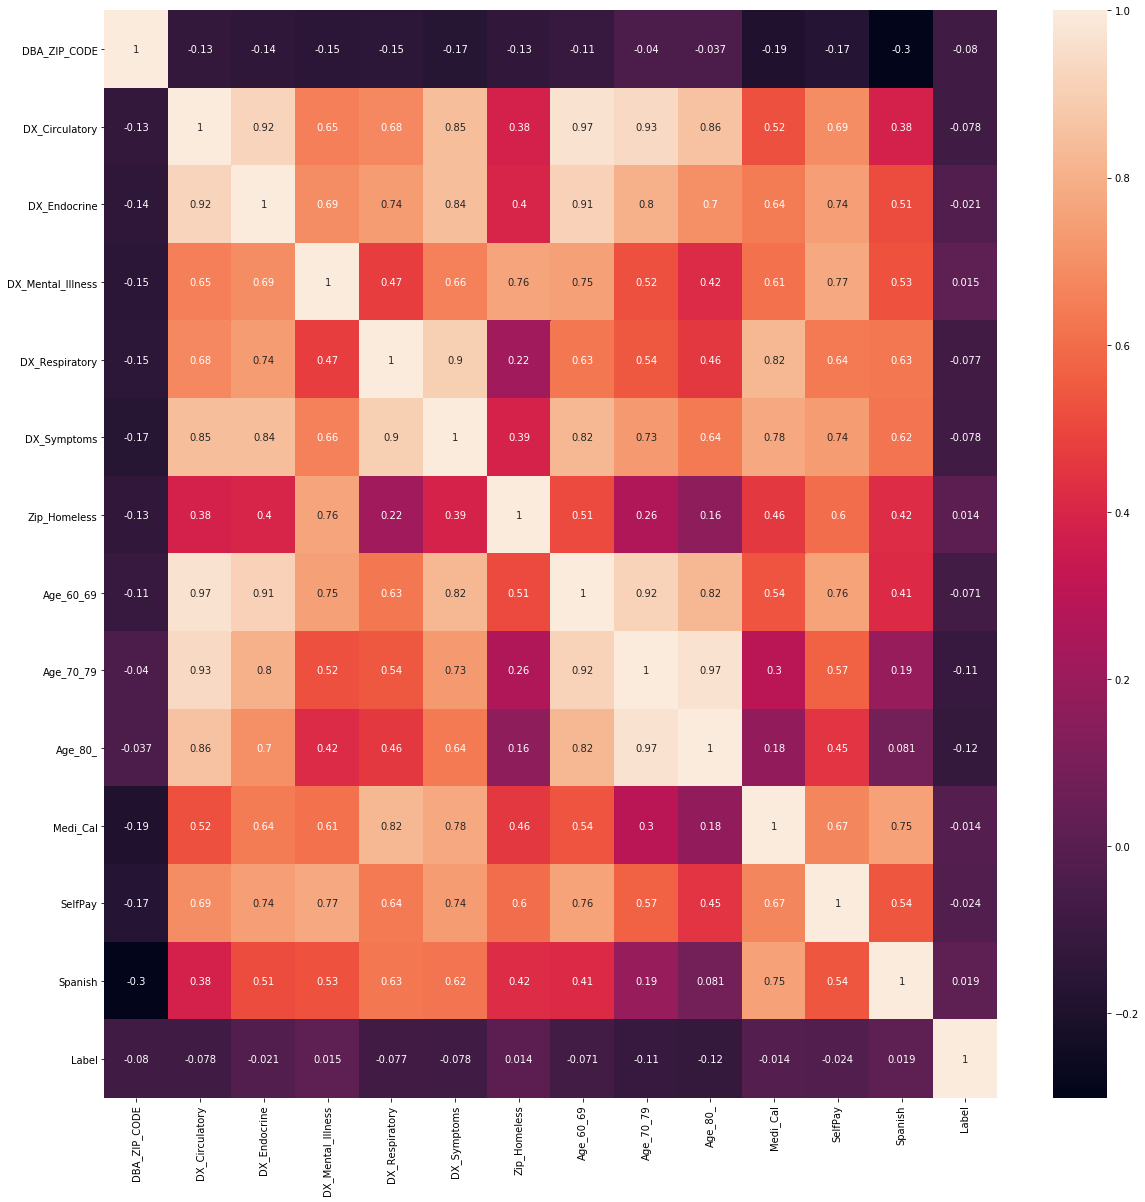

In [17]:
correlations = correlations_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [20]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=173))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               17400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 37,802
Trainable params: 37,802
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=3
)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

Epoch 572/1000
Epoch 573/1000
Epoch 574/1000
Epoch 575/1000
Epoch 576/1000
Epoch 577/1000
Epoch 578/1000
Epoch 579/1000
Epoch 580/1000
Epoch 581/1000
Epoch 582/1000
Epoch 583/1000
Epoch 584/1000
Epoch 585/1000
Epoch 586/1000
Epoch 587/1000
Epoch 588/1000
Epoch 589/1000
Epoch 590/1000
Epoch 591/1000
Epoch 592/1000
Epoch 593/1000
Epoch 594/1000
Epoch 595/1000
Epoch 596/1000
Epoch 597/1000
Epoch 598/1000
Epoch 599/1000
Epoch 600/1000
Epoch 601/1000
Epoch 602/1000
Epoch 603/1000
Epoch 604/1000
Epoch 605/1000
Epoch 606/1000
Epoch 607/1000
Epoch 608/1000
Epoch 609/1000
Epoch 610/1000
Epoch 611/1000
Epoch 612/1000
Epoch 613/1000
Epoch 614/1000
Epoch 615/1000
Epoch 616/1000
Epoch 617/1000
Epoch 618/1000
Epoch 619/1000
Epoch 620/1000
Epoch 621/1000
Epoch 622/1000
Epoch 623/1000
Epoch 624/1000
Epoch 625/1000
Epoch 626/1000
Epoch 627/1000
Epoch 628/1000
Epoch 629/1000
Epoch 630/1000
Epoch 631/1000
Epoch 632/1000
Epoch 633/1000
Epoch 634/1000
Epoch 635/1000
Epoch 636/1000
Epoch 637/1000
Epoch 638/

In [24]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=3)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 6.357044671711169, Accuracy: 0.5921052694320679


In [25]:
model.get_weights()

[array([[-0.12525618,  0.00740227, -0.0655892 , ...,  0.08981007,
         -0.10116592,  0.11001986],
        [ 0.07708031, -0.01119288,  0.10856058, ...,  0.04385861,
         -0.05912841, -0.02679977],
        [ 0.0426795 ,  0.07847451, -0.07265381, ...,  0.03954045,
          0.11968512,  0.11463428],
        ...,
        [-0.14612362,  0.10663374, -0.14844938, ..., -0.0330628 ,
         -0.11924113, -0.10641894],
        [ 0.15387012,  0.14277026, -0.00676779, ...,  0.15484703,
         -0.09489239, -0.09343584],
        [-0.03824678,  0.10961958,  0.12273701, ...,  0.1479531 ,
         -0.04376689, -0.00648541]], dtype=float32),
 array([-0.01230268, -0.00095644, -0.00930966,  0.04538943,  0.00629362,
         0.01480366,  0.05135107,  0.00983518,  0.00215665, -0.0042401 ,
        -0.02151509,  0.01041435,  0.00889066, -0.01360103, -0.02032571,
         0.02414543, -0.01231144,  0.01582151, -0.01747748, -0.00029278,
         0.00499053,  0.00694016,  0.00418213,  0.01857446, -0.010